In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from numpy import where
# Dataset
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Modelo
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tqdm import tqdm_notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1 Criando o conjunto de treino e teste

In [3]:
n_classes=3
n_features=2
X, y = make_blobs(n_samples=1000, centers=n_classes, n_features=n_features, cluster_std=2, random_state=2)

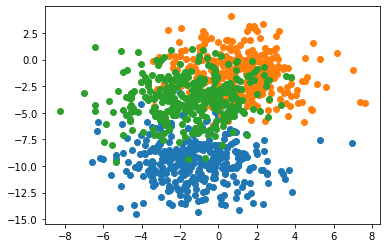

In [4]:
for class_value in range(n_classes):
    #retorna os índices onde a condição y==class_value é atendida
    row_ix = where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [5]:
def create_dataset():
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    y_categorical = to_categorical(y)
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = create_dataset()

In [7]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(700, 2) (700, 3) (300, 2) (300, 3)


# 2 Avaliando a capacidade do modelo

In [19]:
def model_training(n_nodes, n_layers, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

In [20]:
def model_evaluation(model, X_test, y_test):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

camadas=1; nós=1; acc= 0.767
camadas=1; nós=2; acc= 0.817
camadas=1; nós=3; acc= 0.827
camadas=1; nós=4; acc= 0.853
camadas=1; nós=5; acc= 0.843
camadas=1; nós=6; acc= 0.830


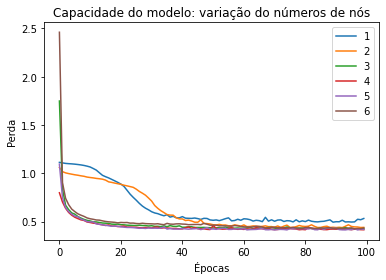

  0%|          | 0/6 [00:00<?, ?it/s]

camadas=2; nós=1; acc= 0.327
camadas=2; nós=2; acc= 0.793
camadas=2; nós=3; acc= 0.847
camadas=2; nós=4; acc= 0.843
camadas=2; nós=5; acc= 0.783
camadas=2; nós=6; acc= 0.840


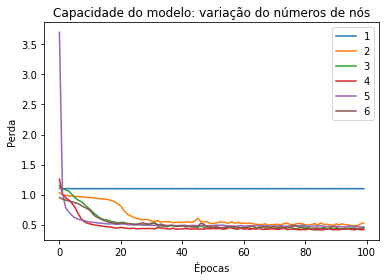

  0%|          | 0/6 [00:00<?, ?it/s]

camadas=3; nós=1; acc= 0.330
camadas=3; nós=2; acc= 0.773
camadas=3; nós=3; acc= 0.843
camadas=3; nós=4; acc= 0.827
camadas=3; nós=5; acc= 0.823
camadas=3; nós=6; acc= 0.837


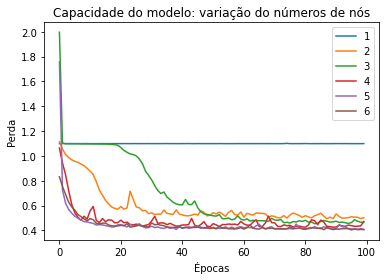

In [21]:
for n_layers in tqdm_notebook(range(1,4)):
    for n_nodes in tqdm_notebook(range(1,7)):
        
        model, history = model_training(n_nodes, n_layers, X_train, y_train)
        test_acc = model_evaluation(model,X_test, y_test)
    
        print('camadas=%d; nós=%d; acc= %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()

# 3 Definido a capacidade do modelo e avaliando os tipos de batch size

In [11]:
def model_training(batch_approach, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    if batch_approach == "batch":
        batch_size=len(X_train)
    elif batch_approach == "stochastic":
        batch_size=1
    else: batch_size=32
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(5, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=batch_size)
    return model, history

Batch: batch, Treino: 0.787, Teste: 0.813
Batch: minibatch, Treino: 0.826, Teste: 0.840
Batch: stochastic, Treino: 0.330, Teste: 0.343


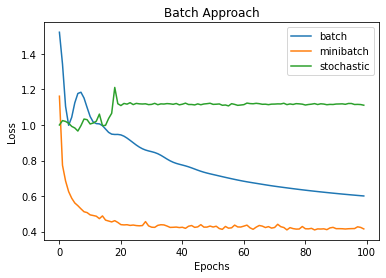

In [12]:
# evaluate model with a given number of nodes
batch_approach = ["batch","minibatch","stochastic"]
for i in batch_approach:
    model, history = model_training(i,X_train, y_train)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('Batch: %s, Treino: %.3f, Teste: %.3f' % (i, train_acc, test_acc))
    
    # plota a curva de perda para cada tipo de batch size
    plt.plot(history.history['loss'], label=i)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Approach')    
plt.legend()
plt.show()

# 4 Variando o tamanho do minibatch

In [13]:
def model_training(batch_approach, n_batch, X_train, y_train, X_test, y_test):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    if batch_approach == "batch":
        batch_size=len(X_train)
    elif batch_approach == "stochastic":
        batch_size=1
    else: batch_size=n_batch
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(5, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, verbose=0,batch_size=batch_size, validation_data=(X_test, y_test))
    
    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch),pad=-10)
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    
    return model, history

  0%|          | 0/8 [00:00<?, ?it/s]

N_Batch: 8, Treino: 0.820, Teste: 0.830
N_Batch: 16, Treino: 0.816, Teste: 0.833
N_Batch: 32, Treino: 0.821, Teste: 0.837
N_Batch: 64, Treino: 0.819, Teste: 0.833
N_Batch: 128, Treino: 0.816, Teste: 0.830
N_Batch: 256, Treino: 0.823, Teste: 0.840
N_Batch: 512, Treino: 0.797, Teste: 0.843
N_Batch: 1024, Treino: 0.804, Teste: 0.840


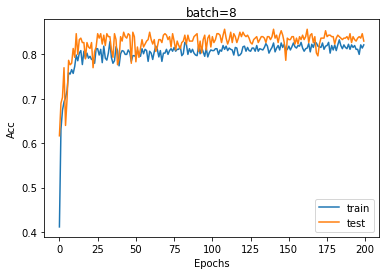

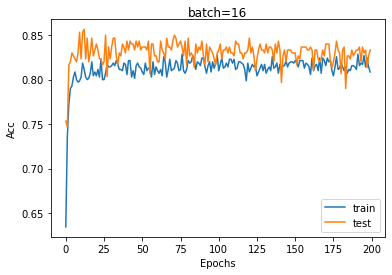

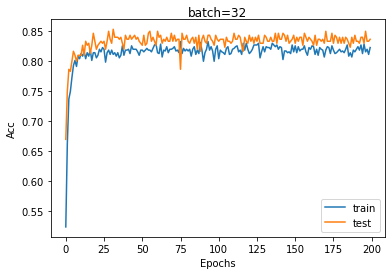

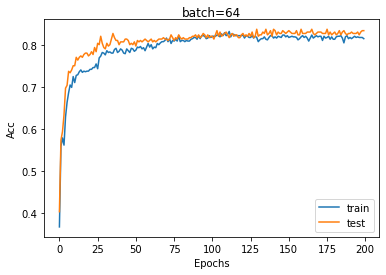

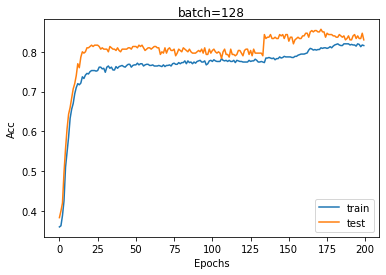

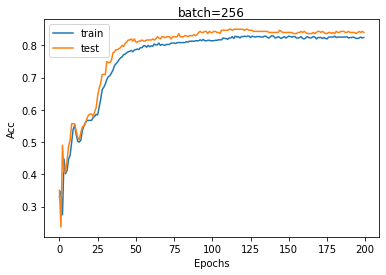

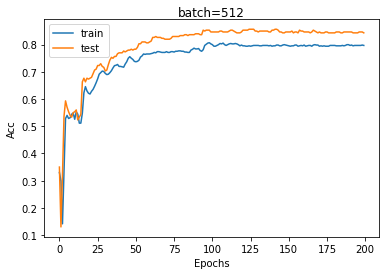

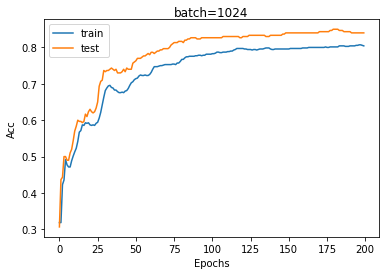

In [14]:
batch_approach = "minibatch"
n_batch = [8, 16, 32, 64, 128, 256, 512, 1024]
for i in tqdm_notebook(range(len(n_batch))):
    
    plt.subplots(1,1)
               
    model, history = model_training(batch_approach, n_batch[i], X_train, y_train, X_test, y_test)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('N_Batch: %s, Treino: %.3f, Teste: %.3f' % (n_batch[i], train_acc, test_acc))
    
plt.show()

# 5 Diferentes valores de taxa de aprendizado

In [15]:
def model_training(batch_approach, n_batch, lrate,  X_train, y_train, X_test, y_test):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    if batch_approach == "batch":
        batch_size=len(X_train)
    elif batch_approach == "stochastic":
        batch_size=1
    else: batch_size=n_batch
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(5, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=lrate, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, verbose=0,batch_size=batch_size, validation_data=(X_test, y_test))
    
    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(learning_rates[i]), pad=-80)
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    
    return model, history

  0%|          | 0/8 [00:00<?, ?it/s]

l_rate: 1.0, Treino: 0.330, Teste: 0.343
l_rate: 0.1, Treino: 0.761, Teste: 0.783
l_rate: 0.01, Treino: 0.773, Teste: 0.800
l_rate: 0.001, Treino: 0.769, Teste: 0.810
l_rate: 0.0001, Treino: 0.457, Teste: 0.463
l_rate: 1e-05, Treino: 0.516, Teste: 0.560
l_rate: 1e-06, Treino: 0.366, Teste: 0.367
l_rate: 1e-07, Treino: 0.481, Teste: 0.480


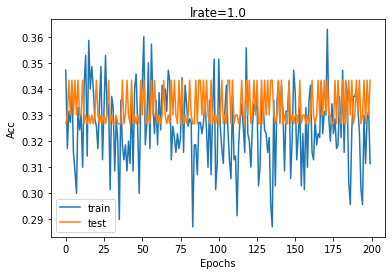

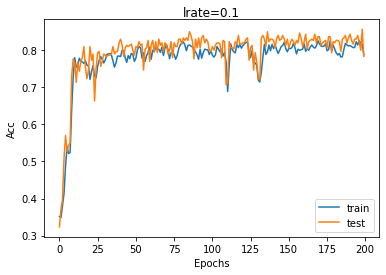

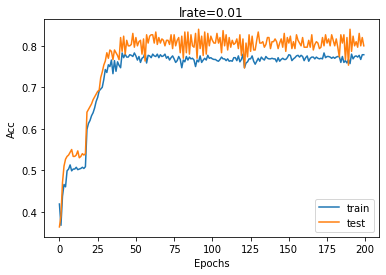

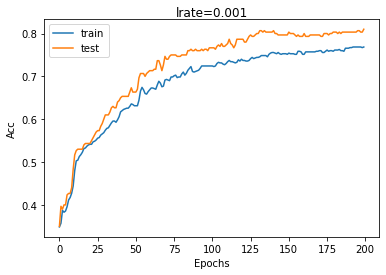

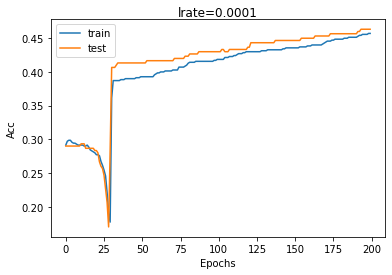

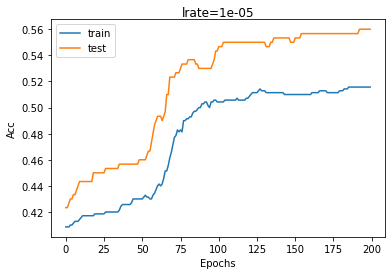

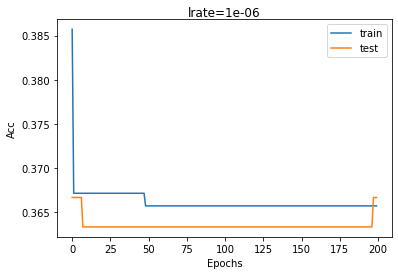

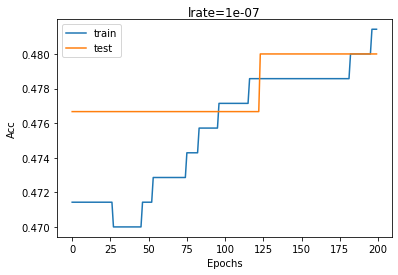

In [16]:
#128
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in tqdm_notebook(range(len(learning_rates))):

    plt.subplots(1,1)
               
    model, history = model_training("minibatch", 128,learning_rates[i], X_train, y_train, X_test, y_test)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('l_rate: %s, Treino: %.3f, Teste: %.3f' % (learning_rates[i], train_acc, test_acc))
    
plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

l_rate: 1.0, Treino: 0.336, Teste: 0.327
l_rate: 0.1, Treino: 0.826, Teste: 0.847
l_rate: 0.01, Treino: 0.817, Teste: 0.840
l_rate: 0.001, Treino: 0.770, Teste: 0.800
l_rate: 0.0001, Treino: 0.319, Teste: 0.290
l_rate: 1e-05, Treino: 0.476, Teste: 0.503
l_rate: 1e-06, Treino: 0.537, Teste: 0.580
l_rate: 1e-07, Treino: 0.336, Teste: 0.327


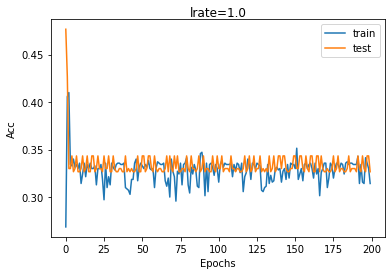

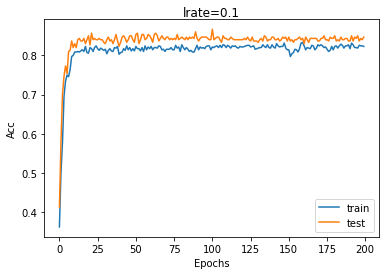

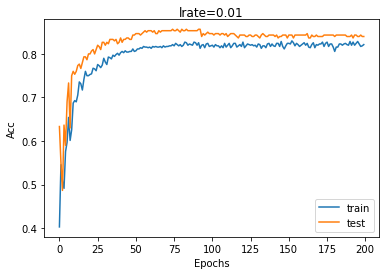

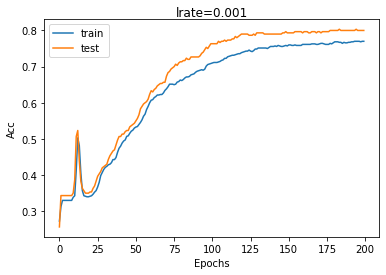

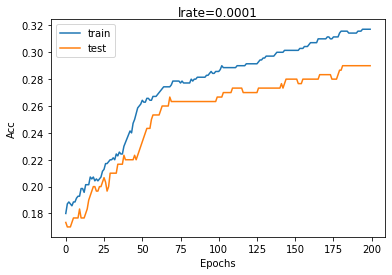

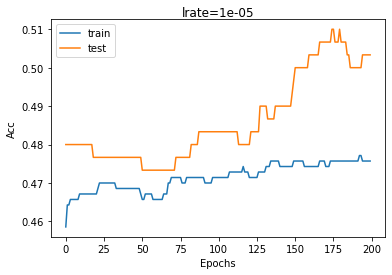

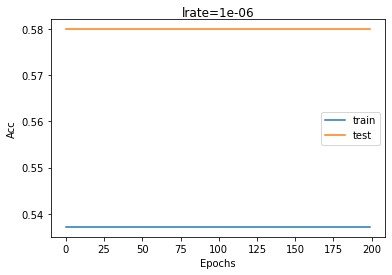

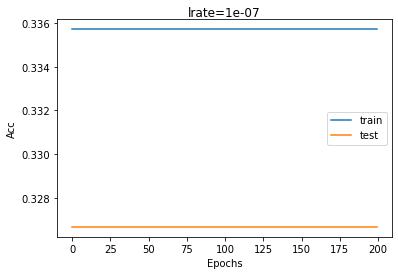

In [17]:
#256
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in tqdm_notebook(range(len(learning_rates))):

    plt.subplots(1,1)
               
    model, history = model_training("minibatch", 256,learning_rates[i], X_train, y_train, X_test, y_test)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('l_rate: %s, Treino: %.3f, Teste: %.3f' % (learning_rates[i], train_acc, test_acc))
    
plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

l_rate: 1.0, Treino: 0.336, Teste: 0.327
l_rate: 0.1, Treino: 0.777, Teste: 0.783
l_rate: 0.01, Treino: 0.819, Teste: 0.837
l_rate: 0.001, Treino: 0.813, Teste: 0.843
l_rate: 0.0001, Treino: 0.739, Teste: 0.773
l_rate: 1e-05, Treino: 0.260, Teste: 0.243
l_rate: 1e-06, Treino: 0.353, Teste: 0.387
l_rate: 1e-07, Treino: 0.243, Teste: 0.237


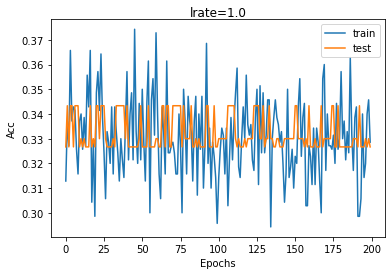

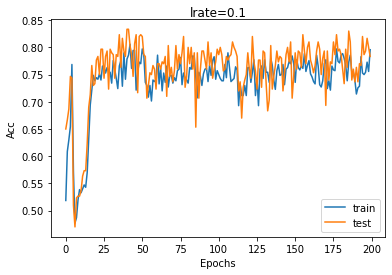

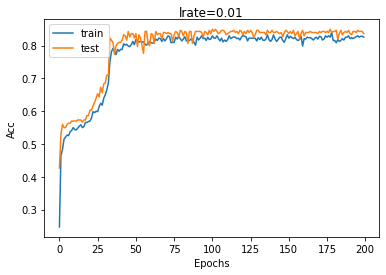

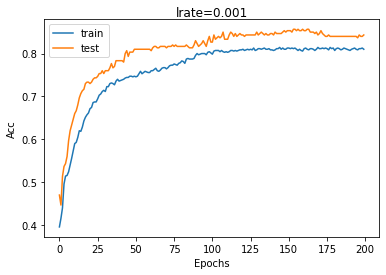

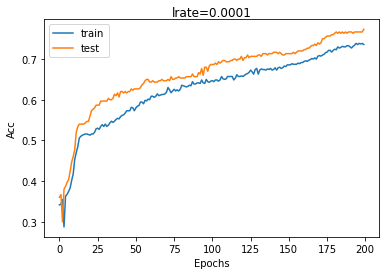

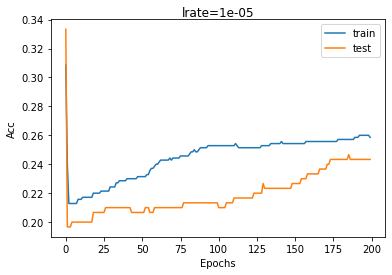

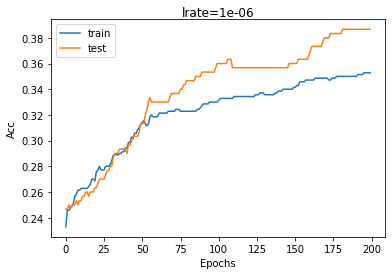

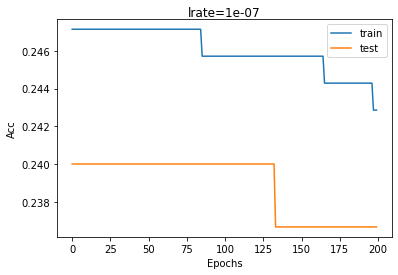

In [18]:
#64
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in tqdm_notebook(range(len(learning_rates))):

    plt.subplots(1,1)
               
    model, history = model_training("minibatch", 64,learning_rates[i], X_train, y_train, X_test, y_test)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('l_rate: %s, Treino: %.3f, Teste: %.3f' % (learning_rates[i], train_acc, test_acc))
    
plt.show()